# LSTM - datos 20 dia

Cargamos los datos:

In [1]:
run Datos-20dias.ipynb

Construimos el modelo:

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense
from sklearn.metrics import mean_absolute_error,r2_score
from tensorflow import keras

In [3]:
def subida(list):
    resultado = []
    for i in range(1,len(list)):
        if  (list)[i] > (list)[i-1]:
            resultado.append(1)
        else:
            resultado.append(0)
    return resultado

def acierto(list1,list2):
    sum = 0
    for i in range(0,len(list1)):
        if(list1[i]==list2[i]):
            sum = sum +1
    a = sum/len(list1)
    return a


# CONJUNTO DE DATOS 1

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [4]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(1))
    model.compile(optimizer=optimizer_fun, loss=loss_fun)
    return model

Modelo 100 neuronas:

In [5]:
modelLSTM100 = build_model1(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 11, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 11, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 11, 33)            11088     
                                                                 
 lstm_3 (LSTM)               (None, 25)                5900      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [6]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
47/47 [==============================] - 9s 35ms/step - loss: 13468.6924
Epoch 2/100
47/47 [==============================] - 1s 30ms/step - loss: 8066.2910
Epoch 3/100
47/47 [==============================] - 2s 32ms/step - loss: 7020.0376
Epoch 4/100
47/47 [==============================] - 1s 31ms/step - loss: 4839.8667
Epoch 5/100
47/47 [==============================] - 1s 29ms/step - loss: 4645.9097
Epoch 6/100
47/47 [==============================] - 1s 29ms/step - loss: 5349.8296
Epoch 7/100
47/47 [==============================] - 1s 28ms/step - loss: 5975.5796
Epoch 8/100
47/47 [==============================] - 1s 31ms/step - loss: 5128.8130
Epoch 9/100
47/47 [==============================] - 1s 29ms/step - loss: 4691.6470
Epoch 10/100
47/47 [==============================] - 1s 30ms/step - loss: 4332.1289
Epoch 11/100
47/47 [==============================] - 2s 34ms/step - loss: 5468.8276
Epoch 12/100
47/47 [==============================] - 2s 35ms/step - loss

In [7]:
y_predLSTM100 = modelLSTM100.predict(testX1)

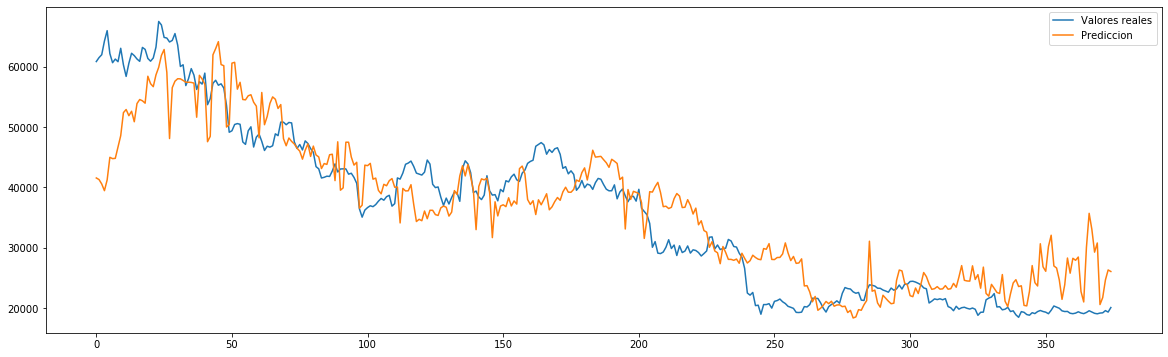

In [8]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [9]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 4763.047941874999
R-cuadrado: 0.8026258798914666
Tasa de acierto de subida: 0.5320855614973262


Modelo 64 neuronas

In [10]:
modelLSTM64 = build_model1(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 11, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 11, 32)            12416     
                                                                 
 lstm_6 (LSTM)               (None, 11, 21)            4536      
                                                                 
 lstm_7 (LSTM)               (None, 16)                2432      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [11]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
47/47 [==============================] - 9s 22ms/step - loss: 11545.9268
Epoch 2/100
47/47 [==============================] - 1s 22ms/step - loss: 8490.6279
Epoch 3/100
47/47 [==============================] - 1s 21ms/step - loss: 7082.6826
Epoch 4/100
47/47 [==============================] - 1s 25ms/step - loss: 7704.1240
Epoch 5/100
47/47 [==============================] - 1s 21ms/step - loss: 9243.8955
Epoch 6/100
47/47 [==============================] - 1s 21ms/step - loss: 8626.4160
Epoch 7/100
47/47 [==============================] - 1s 22ms/step - loss: 7310.0713
Epoch 8/100
47/47 [==============================] - 1s 26ms/step - loss: 5070.8984
Epoch 9/100
47/47 [==============================] - 1s 26ms/step - loss: 4915.3257
Epoch 10/100
47/47 [==============================] - 1s 27ms/step - loss: 3548.3616
Epoch 11/100
47/47 [==============================] - 1s 24ms/step - loss: 4284.1128
Epoch 12/100
47/47 [==============================] - 1s 26ms/step - loss

In [12]:
y_predLSTM64 = modelLSTM64.predict(testX1)

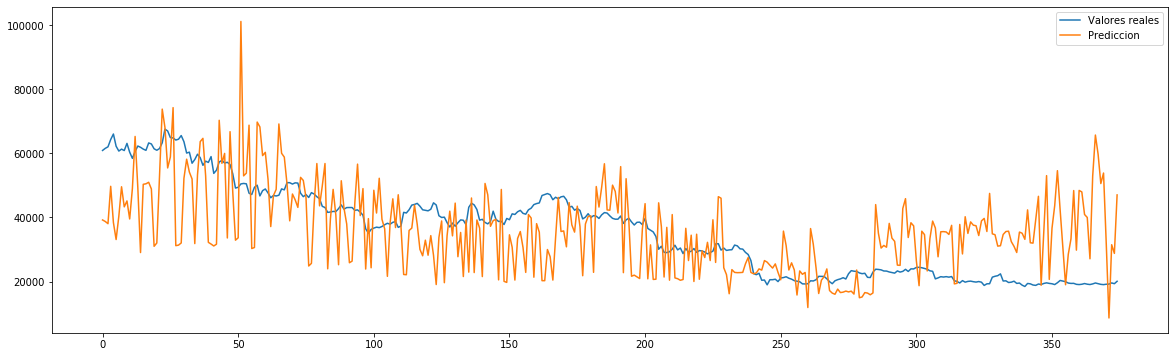

In [13]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [14]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 11249.225621875
R-cuadrado: -0.04490819978452287
Tasa de acierto de subida: 0.5240641711229946


Modelo 32 neuronas:

In [15]:
modelLSTM32 = build_model1(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 11, 32)            4352      
                                                                 
 lstm_9 (LSTM)               (None, 11, 16)            3136      
                                                                 
 lstm_10 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_11 (LSTM)              (None, 8)                 640       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [16]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
47/47 [==============================] - 10s 15ms/step - loss: 15954.4707
Epoch 2/100
47/47 [==============================] - 1s 18ms/step - loss: 15778.4561
Epoch 3/100
47/47 [==============================] - 1s 22ms/step - loss: 15606.2256
Epoch 4/100
47/47 [==============================] - 1s 21ms/step - loss: 15397.2314
Epoch 5/100
47/47 [==============================] - 1s 21ms/step - loss: 15143.6006
Epoch 6/100
47/47 [==============================] - 1s 20ms/step - loss: 13877.3369
Epoch 7/100
47/47 [==============================] - 1s 20ms/step - loss: 12210.4082
Epoch 8/100
47/47 [==============================] - 1s 22ms/step - loss: 10133.9902
Epoch 9/100
47/47 [==============================] - 1s 20ms/step - loss: 10976.8379
Epoch 10/100
47/47 [==============================] - 1s 18ms/step - loss: 11183.6602
Epoch 11/100
47/47 [==============================] - 1s 18ms/step - loss: 9951.8604
Epoch 12/100
47/47 [==============================] - 1s 19ms/s

In [17]:
y_predLSTM32 = modelLSTM32.predict(testX1)

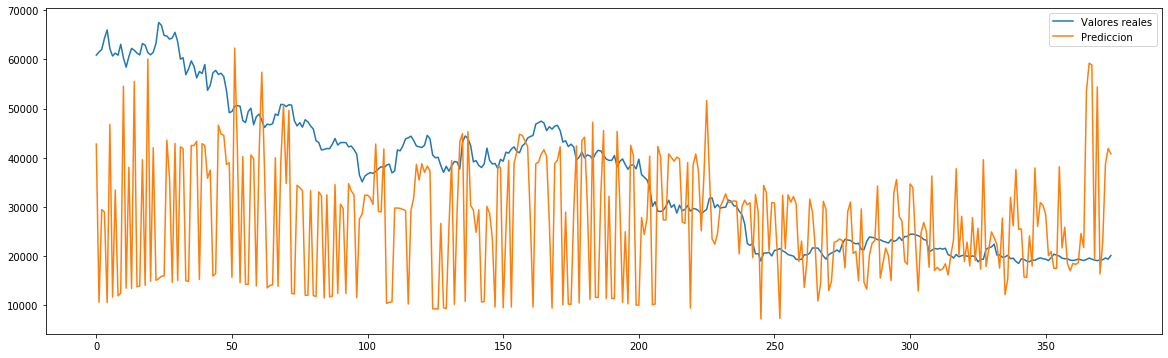

In [18]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [19]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 14009.299079270835
R-cuadrado: -0.924386356145859
Tasa de acierto de subida: 0.47058823529411764


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [20]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

Modelo 100 neuronas:

In [21]:
modelLSTM100 = build_model2(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 11, 100)           80400     
                                                                 
 lstm_14 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [22]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
47/47 [==============================] - 16s 31ms/step - loss: 13220.7646 - mae: 13220.7646
Epoch 2/100
47/47 [==============================] - 1s 29ms/step - loss: 4111.0508 - mae: 4111.0508
Epoch 3/100
47/47 [==============================] - 2s 45ms/step - loss: 4638.1895 - mae: 4638.1895
Epoch 4/100
47/47 [==============================] - 2s 49ms/step - loss: 4422.2344 - mae: 4422.2344
Epoch 5/100
47/47 [==============================] - 2s 49ms/step - loss: 3806.8870 - mae: 3806.8870
Epoch 6/100
47/47 [==============================] - 2s 51ms/step - loss: 3524.8018 - mae: 3524.8018
Epoch 7/100
47/47 [==============================] - 2s 48ms/step - loss: 3373.3489 - mae: 3373.3489
Epoch 8/100
47/47 [==============================] - 2s 45ms/step - loss: 3117.4983 - mae: 3117.4983
Epoch 9/100
47/47 [==============================] - 2s 45ms/step - loss: 2601.9541 - mae: 2601.9541
Epoch 10/100
47/47 [==============================] - 3s 53ms/step - loss: 2689.3010 - m

In [23]:
y_predLSTM100 = modelLSTM100.predict(testX1)

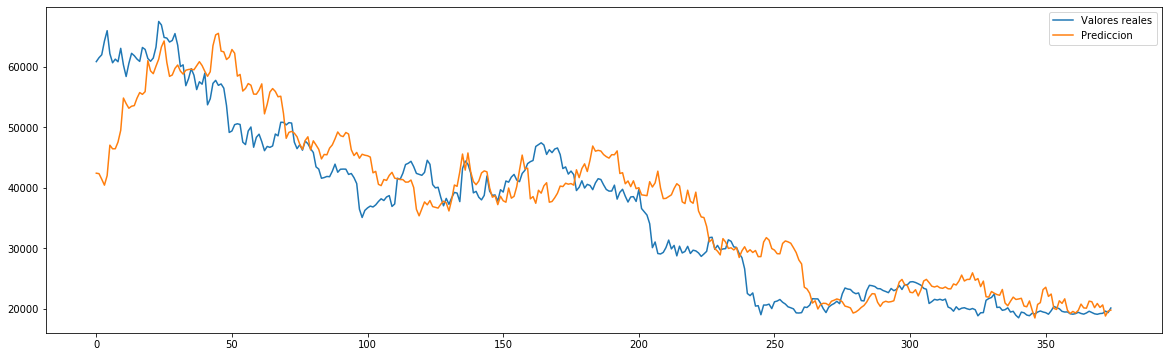

In [24]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [25]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 4310.828196458334
R-cuadrado: 0.8253963286995775
Tasa de acierto de subida: 0.4893048128342246


Modelo 64 neuronas

In [26]:
modelLSTM64 = build_model2(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_17 (LSTM)              (None, 11, 64)            33024     
                                                                 
 lstm_18 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_19 (LSTM)              (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [27]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
47/47 [==============================] - 10s 20ms/step - loss: 14660.1055 - mae: 14660.1055
Epoch 2/100
47/47 [==============================] - 1s 20ms/step - loss: 7627.1309 - mae: 7627.1309
Epoch 3/100
47/47 [==============================] - 1s 20ms/step - loss: 5937.2769 - mae: 5937.2769
Epoch 4/100
47/47 [==============================] - 1s 26ms/step - loss: 3225.6765 - mae: 3225.6765
Epoch 5/100
47/47 [==============================] - 1s 28ms/step - loss: 2945.8298 - mae: 2945.8298
Epoch 6/100
47/47 [==============================] - 1s 27ms/step - loss: 3611.5535 - mae: 3611.5535
Epoch 7/100
47/47 [==============================] - 1s 30ms/step - loss: 3533.6851 - mae: 3533.6851
Epoch 8/100
47/47 [==============================] - 1s 27ms/step - loss: 3656.7439 - mae: 3656.7439
Epoch 9/100
47/47 [==============================] - 1s 25ms/step - loss: 3354.9487 - mae: 3354.9487
Epoch 10/100
47/47 [==============================] - 1s 25ms/step - loss: 3131.8625 - m

In [28]:
y_predLSTM64 = modelLSTM64.predict(testX1)

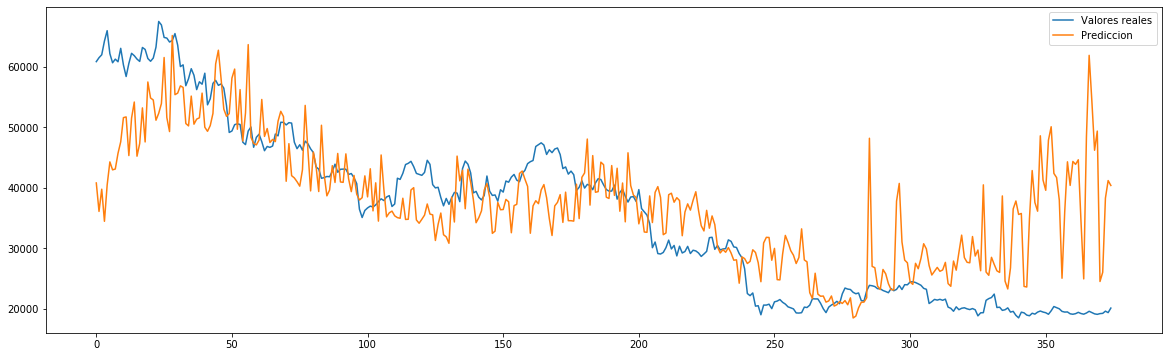

In [29]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [30]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 7061.668183541666
R-cuadrado: 0.49756584872690923
Tasa de acierto de subida: 0.553475935828877


Modelo 32 neuronas:

In [31]:
modelLSTM32 = build_model2(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_21 (LSTM)              (None, 11, 32)            8320      
                                                                 
 lstm_22 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_23 (LSTM)              (None, 16)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [32]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
47/47 [==============================] - 8s 15ms/step - loss: 15200.6270 - mae: 15200.6270
Epoch 2/100
47/47 [==============================] - 1s 15ms/step - loss: 14491.2246 - mae: 14491.2246
Epoch 3/100
47/47 [==============================] - 1s 15ms/step - loss: 9546.0049 - mae: 9546.0049
Epoch 4/100
47/47 [==============================] - 1s 14ms/step - loss: 5062.3003 - mae: 5062.3003
Epoch 5/100
47/47 [==============================] - 1s 14ms/step - loss: 6608.4590 - mae: 6608.4590
Epoch 6/100
47/47 [==============================] - 1s 14ms/step - loss: 5054.1743 - mae: 5054.1743
Epoch 7/100
47/47 [==============================] - 1s 17ms/step - loss: 4841.8120 - mae: 4841.8120
Epoch 8/100
47/47 [==============================] - 1s 21ms/step - loss: 3733.5747 - mae: 3733.5747
Epoch 9/100
47/47 [==============================] - 1s 21ms/step - loss: 3561.1838 - mae: 3561.1838
Epoch 10/100
47/47 [==============================] - 1s 21ms/step - loss: 4949.9189 - 

In [33]:
y_predLSTM32 = modelLSTM32.predict(testX1)

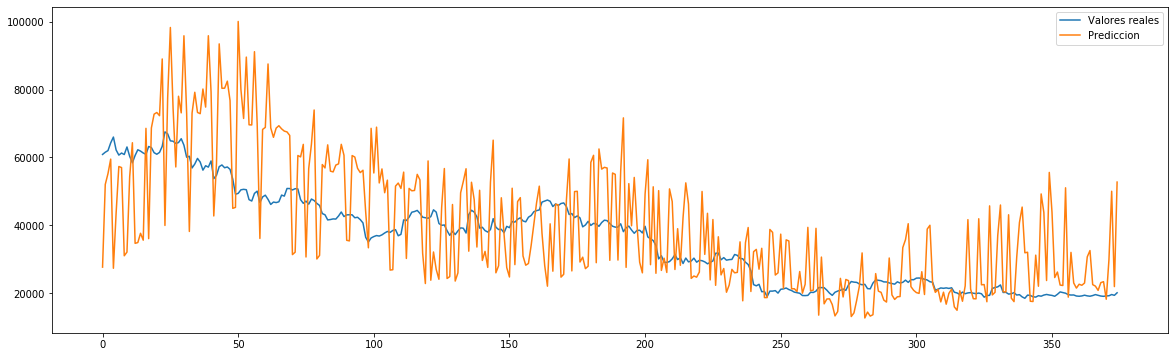

In [34]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [35]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 11991.932753437499
R-cuadrado: -0.17050380919248131
Tasa de acierto de subida: 0.5026737967914439


### EXPERIMENTO 3: Modelo 10 capas

In [36]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model


Modelo 100 neuronas:

In [37]:
modelLSTM100 = build_model3(100,1,'relu','mae','adam')
modelLSTM100.summary()

modelLSTM100.fit(trainX1, trainy1, epochs=100)
 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_25 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_26 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_27 (LSTM)              (None, 11, 25)            5900      
                                                                 
 lstm_28 (LSTM)              (None, 11, 20)            3680      
                                                                 
 lstm_29 (LSTM)              (None, 11, 17)            2584      
                                                                 
 lstm_30 (LSTM)              (None, 11, 14)           

In [38]:
y_predLSTM100 = modelLSTM100.predict(testX1)

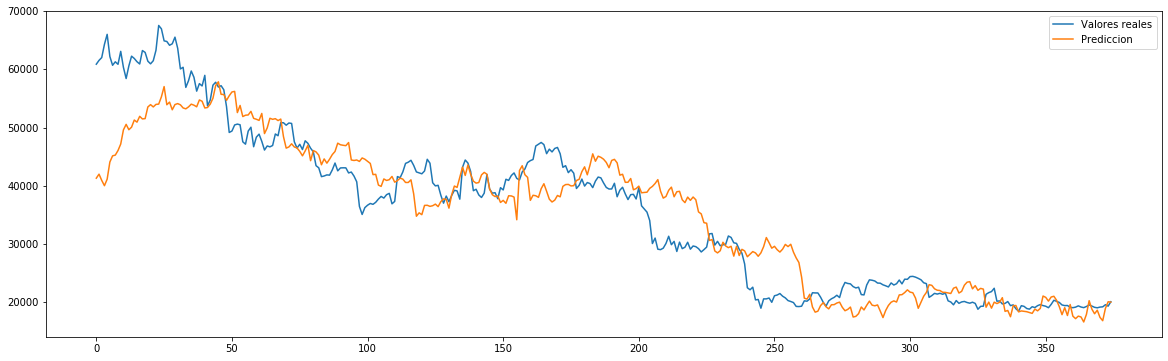

In [39]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [40]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 4205.790983333333
R-cuadrado: 0.8272573991220404
Tasa de acierto de subida: 0.49732620320855614


Modelo 64 neuronas:

In [41]:
modelLSTM64 = build_model3(64,1,'relu','mae','adam')
modelLSTM64.summary()

modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_34 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_35 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_36 (LSTM)              (None, 11, 16)            2432      
                                                                 
 lstm_37 (LSTM)              (None, 11, 13)            1560      
                                                                 
 lstm_38 (LSTM)              (None, 11, 11)            1100      
                                                                 
 lstm_39 (LSTM)              (None, 11, 9)            

In [42]:
y_predLSTM64 = modelLSTM64.predict(testX1)

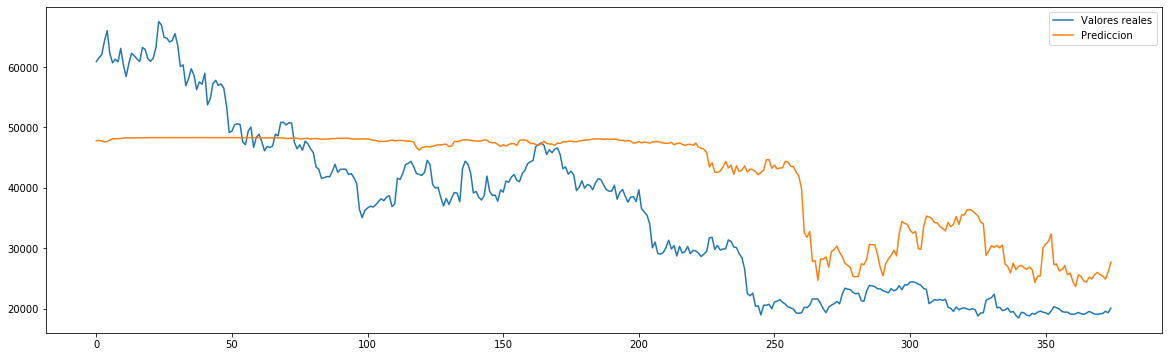

In [43]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [44]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 9328.518269583334
R-cuadrado: 0.3844051519115016
Tasa de acierto de subida: 0.4919786096256685


Modelo 32 neuronas:

In [45]:
modelLSTM32 = build_model3(32,1,'relu','mae','adam')
modelLSTM32.summary()

modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_43 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_44 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_45 (LSTM)              (None, 11, 8)             640       
                                                                 
 lstm_46 (LSTM)              (None, 11, 6)             360       
                                                                 
 lstm_47 (LSTM)              (None, 11, 5)             240       
                                                                 
 lstm_48 (LSTM)              (None, 11, 5)            

In [46]:
y_predLSTM32 = modelLSTM32.predict(testX1)

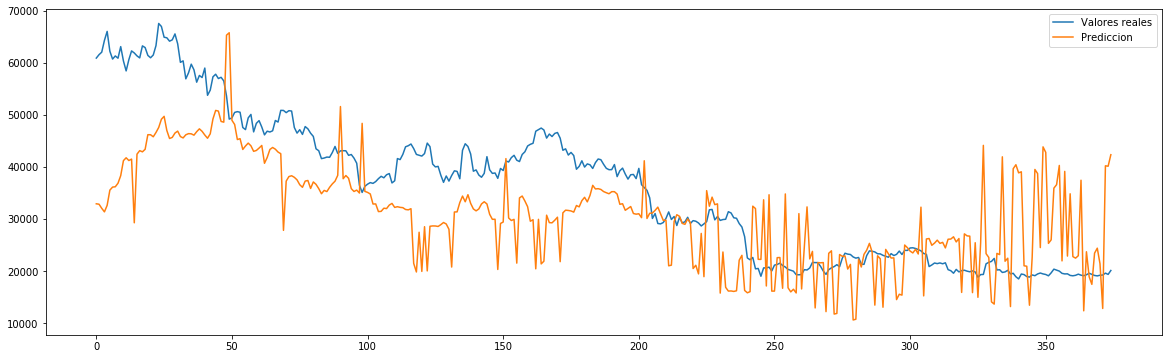

In [47]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [48]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 8968.811399583332
R-cuadrado: 0.33127701765402673
Tasa de acierto de subida: 0.5026737967914439


### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [49]:
modelLSTM100 = build_model1(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_52 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_53 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_54 (LSTM)              (None, 25)                5900      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [50]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
47/47 [==============================] - 15s 21ms/step - loss: 15193.0723
Epoch 2/100
47/47 [==============================] - 1s 21ms/step - loss: 15074.9326
Epoch 3/100
47/47 [==============================] - 1s 21ms/step - loss: 14987.3633
Epoch 4/100
47/47 [==============================] - 1s 22ms/step - loss: 15024.1504
Epoch 5/100
47/47 [==============================] - 1s 22ms/step - loss: 14897.2246
Epoch 6/100
47/47 [==============================] - 1s 23ms/step - loss: 14681.6689
Epoch 7/100
47/47 [==============================] - 1s 21ms/step - loss: 14560.5205
Epoch 8/100
47/47 [==============================] - 1s 21ms/step - loss: 14511.6055
Epoch 9/100
47/47 [==============================] - 1s 20ms/step - loss: 14417.5264
Epoch 10/100
47/47 [==============================] - 1s 21ms/step - loss: 14320.5693
Epoch 11/100
47/47 [==============================] - 1s 21ms/step - loss: 14199.1816
Epoch 12/100
47/47 [==============================] - 1s 20ms/

In [51]:
y_predLSTM100 = modelLSTM100.predict(testX1)

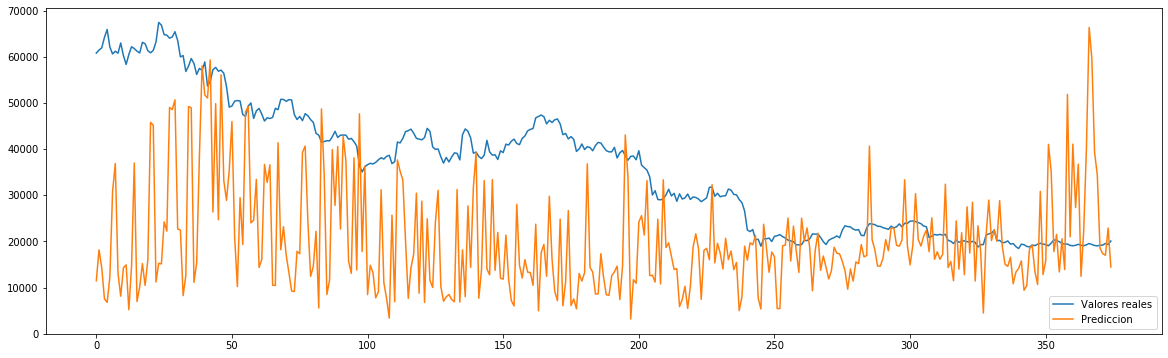

In [52]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [53]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 17937.845811276038
R-cuadrado: -1.7483953926996705
Tasa de acierto de subida: 0.4679144385026738


Modelo 64 neuronas

In [54]:
modelLSTM64 = build_model1(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_56 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_57 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_58 (LSTM)              (None, 16)                2432      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [55]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
47/47 [==============================] - 30s 17ms/step - loss: 15403.3145
Epoch 2/100
47/47 [==============================] - 1s 17ms/step - loss: 15284.9756
Epoch 3/100
47/47 [==============================] - 1s 18ms/step - loss: 15157.2822
Epoch 4/100
47/47 [==============================] - 1s 18ms/step - loss: 15085.1191
Epoch 5/100
47/47 [==============================] - 1s 16ms/step - loss: 15158.0615
Epoch 6/100
47/47 [==============================] - 1s 17ms/step - loss: 15083.2979
Epoch 7/100
47/47 [==============================] - 1s 17ms/step - loss: 15010.9102
Epoch 8/100
47/47 [==============================] - 1s 17ms/step - loss: 14912.8203
Epoch 9/100
47/47 [==============================] - 1s 17ms/step - loss: 14917.2246
Epoch 10/100
47/47 [==============================] - 1s 17ms/step - loss: 14916.1855
Epoch 11/100
47/47 [==============================] - 1s 17ms/step - loss: 14884.6436
Epoch 12/100
47/47 [==============================] - 1s 17ms/

In [56]:
y_predLSTM64 = modelLSTM64.predict(testX1)

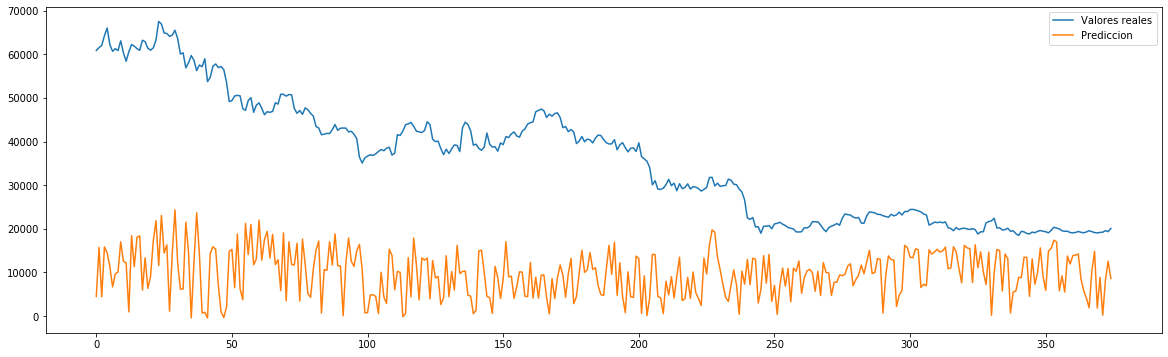

In [57]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [58]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 26056.084140205483
R-cuadrado: -3.608553770829654
Tasa de acierto de subida: 0.5320855614973262


Modelo 32 neuronas:

In [59]:
modelLSTM32 = build_model1(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_60 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_61 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_62 (LSTM)              (None, 8)                 640       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [60]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
47/47 [==============================] - 21s 16ms/step - loss: 15422.2031
Epoch 2/100
47/47 [==============================] - 1s 14ms/step - loss: 15321.0518
Epoch 3/100
47/47 [==============================] - 1s 14ms/step - loss: 15267.4102
Epoch 4/100
47/47 [==============================] - 1s 14ms/step - loss: 15185.7354
Epoch 5/100
47/47 [==============================] - 1s 14ms/step - loss: 15182.0908
Epoch 6/100
47/47 [==============================] - 1s 16ms/step - loss: 15165.9209
Epoch 7/100
47/47 [==============================] - 1s 16ms/step - loss: 15179.6465
Epoch 8/100
47/47 [==============================] - 1s 15ms/step - loss: 15190.2246
Epoch 9/100
47/47 [==============================] - 1s 15ms/step - loss: 15202.5322
Epoch 10/100
47/47 [==============================] - 1s 15ms/step - loss: 15180.8818
Epoch 11/100
47/47 [==============================] - 1s 14ms/step - loss: 15176.8994
Epoch 12/100
47/47 [==============================] - 1s 16ms/

In [61]:
y_predLSTM32 = modelLSTM32.predict(testX1)

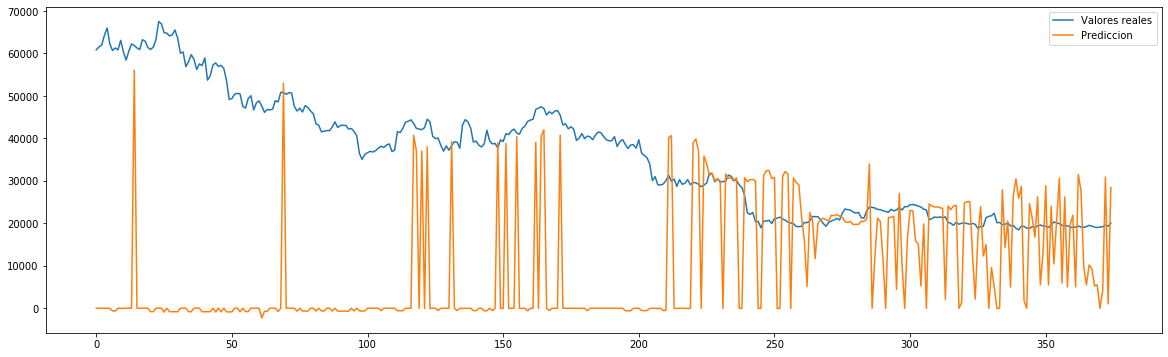

In [62]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [63]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 28809.6746963857
R-cuadrado: -5.531365008512455
Tasa de acierto de subida: 0.5080213903743316


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [64]:
modelLSTM100 = build_model2(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_64 (LSTM)              (None, 11, 100)           80400     
                                                                 
 lstm_65 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_66 (LSTM)              (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [65]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
47/47 [==============================] - 24s 39ms/step - loss: 15109.9492 - mae: 15109.9492
Epoch 2/100
47/47 [==============================] - 2s 40ms/step - loss: 14705.4355 - mae: 14705.4355
Epoch 3/100
47/47 [==============================] - 1s 29ms/step - loss: 14259.1729 - mae: 14259.1729
Epoch 4/100
47/47 [==============================] - 1s 28ms/step - loss: 14070.0947 - mae: 14070.0947
Epoch 5/100
47/47 [==============================] - 1s 29ms/step - loss: 13733.0205 - mae: 13733.0205
Epoch 6/100
47/47 [==============================] - 1s 29ms/step - loss: 13330.2100 - mae: 13330.2100
Epoch 7/100
47/47 [==============================] - 1s 30ms/step - loss: 12672.8389 - mae: 12672.8389
Epoch 8/100
47/47 [==============================] - 1s 29ms/step - loss: 11978.6084 - mae: 11978.6084
Epoch 9/100
47/47 [==============================] - 1s 29ms/step - loss: 11586.5791 - mae: 11586.5791
Epoch 10/100
47/47 [==============================] - 1s 30ms/step - los

In [66]:
y_predLSTM100 = modelLSTM100.predict(testX1)

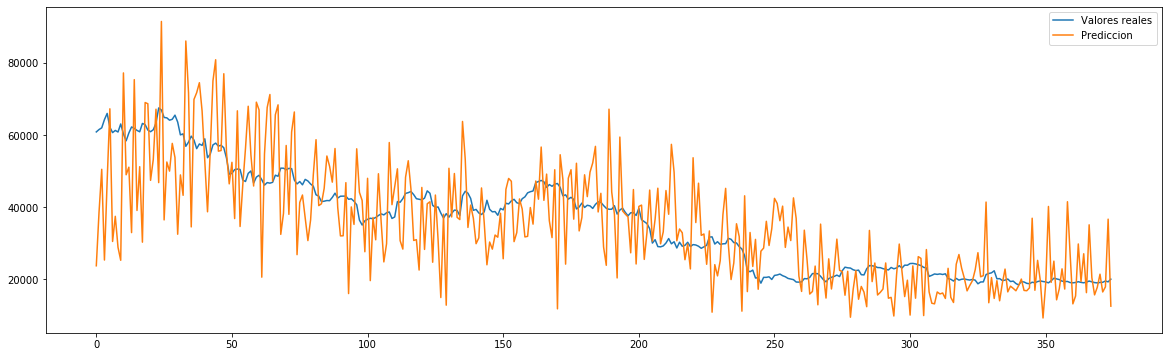

In [67]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [68]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 9192.044876458333
R-cuadrado: 0.25146662697310407
Tasa de acierto de subida: 0.4946524064171123


Modelo 64 neuronas

In [69]:
modelLSTM64 = build_model2(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_67 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_68 (LSTM)              (None, 11, 64)            33024     
                                                                 
 lstm_69 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_70 (LSTM)              (None, 32)                8320      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [70]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
47/47 [==============================] - 40s 30ms/step - loss: 15589.0771 - mae: 15589.0771
Epoch 2/100
47/47 [==============================] - 2s 33ms/step - loss: 15574.9004 - mae: 15574.9004
Epoch 3/100
47/47 [==============================] - 2s 33ms/step - loss: 15559.5254 - mae: 15559.5254
Epoch 4/100
47/47 [==============================] - 2s 33ms/step - loss: 15538.9922 - mae: 15538.9922
Epoch 5/100
47/47 [==============================] - 2s 33ms/step - loss: 15459.8984 - mae: 15459.8984
Epoch 6/100
47/47 [==============================] - 2s 33ms/step - loss: 15404.3711 - mae: 15404.3711
Epoch 7/100
47/47 [==============================] - 2s 32ms/step - loss: 15144.8848 - mae: 15144.8848
Epoch 8/100
47/47 [==============================] - 1s 31ms/step - loss: 14760.1133 - mae: 14760.1133
Epoch 9/100
47/47 [==============================] - 2s 33ms/step - loss: 14524.2881 - mae: 14524.2881
Epoch 10/100
47/47 [==============================] - 2s 32ms/step - los

In [71]:
y_predLSTM64 = modelLSTM64.predict(testX1)

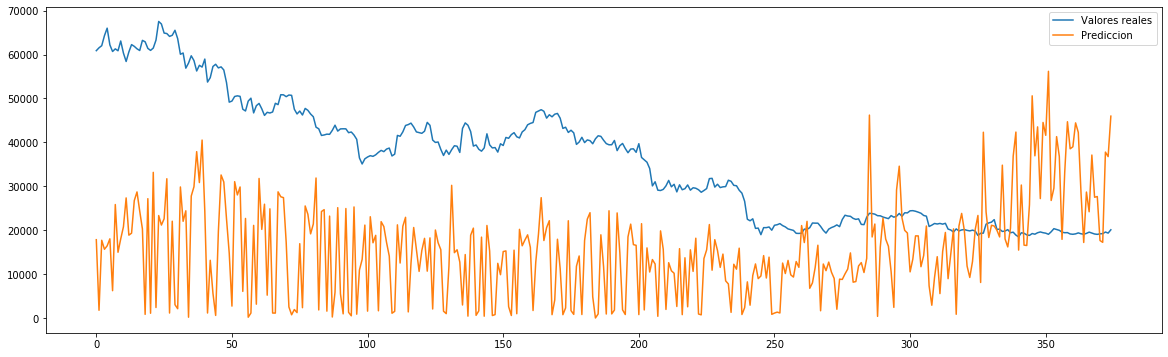

In [72]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [73]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 23472.891930636397
R-cuadrado: -2.91900393477351
Tasa de acierto de subida: 0.4919786096256685


Modelo 32 neuronas:

In [74]:
modelLSTM32 = build_model2(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_72 (LSTM)              (None, 11, 32)            8320      
                                                                 
 lstm_73 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_74 (LSTM)              (None, 16)                2112      
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [75]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
47/47 [==============================] - 27s 21ms/step - loss: 15460.8818 - mae: 15460.8818
Epoch 2/100
47/47 [==============================] - 1s 21ms/step - loss: 14997.6182 - mae: 14997.6182
Epoch 3/100
47/47 [==============================] - 1s 22ms/step - loss: 14259.6875 - mae: 14259.6875
Epoch 4/100
47/47 [==============================] - 1s 20ms/step - loss: 13999.8154 - mae: 13999.8154
Epoch 5/100
47/47 [==============================] - 1s 22ms/step - loss: 13747.2012 - mae: 13747.2012
Epoch 6/100
47/47 [==============================] - 1s 20ms/step - loss: 13490.1650 - mae: 13490.1650
Epoch 7/100
47/47 [==============================] - 1s 22ms/step - loss: 13209.9814 - mae: 13209.9814
Epoch 8/100
47/47 [==============================] - 1s 21ms/step - loss: 12930.1309 - mae: 12930.1309
Epoch 9/100
47/47 [==============================] - 1s 21ms/step - loss: 12607.8057 - mae: 12607.8057
Epoch 10/100
47/47 [==============================] - 1s 20ms/step - los

In [76]:
y_predLSTM32 = modelLSTM32.predict(testX1)

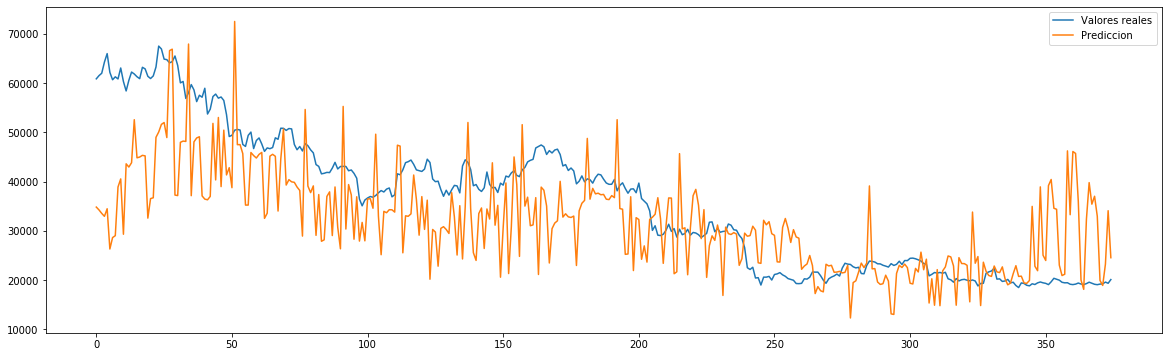

In [77]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [78]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 8372.0288346875
R-cuadrado: 0.3631923866567658
Tasa de acierto de subida: 0.5427807486631016


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [79]:
modelLSTM100 = build_model3(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

modelLSTM100.fit(trainX1, trainy1, epochs=100)
 

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_76 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_77 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_78 (LSTM)              (None, 11, 25)            5900      
                                                                 
 lstm_79 (LSTM)              (None, 11, 20)            3680      
                                                                 
 lstm_80 (LSTM)              (None, 11, 17)            2584      
                                                                 
 lstm_81 (LSTM)              (None, 11, 14)          

In [80]:
y_predLSTM100 = modelLSTM100.predict(testX1)

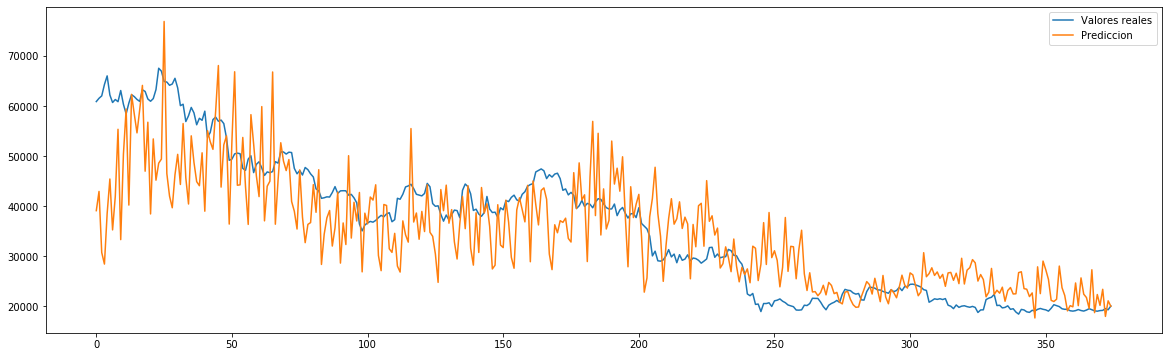

In [81]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [82]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 6592.511546041667
R-cuadrado: 0.5994178282006283
Tasa de acierto de subida: 0.5106951871657754


Modelo 64 neuronas:

In [83]:
modelLSTM64 = build_model3(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_85 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_86 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_87 (LSTM)              (None, 11, 16)            2432      
                                                                 
 lstm_88 (LSTM)              (None, 11, 13)            1560      
                                                                 
 lstm_89 (LSTM)              (None, 11, 11)            1100      
                                                                 
 lstm_90 (LSTM)              (None, 11, 9)           

47/47 [==============================] - 2s 48ms/step - loss: 15541.6748 - mae: 15541.6748
Epoch 64/100
47/47 [==============================] - 2s 50ms/step - loss: 15556.1670 - mae: 15556.1670
Epoch 65/100
47/47 [==============================] - 2s 48ms/step - loss: 15555.8584 - mae: 15555.8584
Epoch 66/100
47/47 [==============================] - 2s 47ms/step - loss: 15538.9688 - mae: 15538.9688
Epoch 67/100
47/47 [==============================] - 2s 48ms/step - loss: 15534.7100 - mae: 15534.7100
Epoch 68/100
47/47 [==============================] - 2s 49ms/step - loss: 15562.2031 - mae: 15562.2031
Epoch 69/100
47/47 [==============================] - 2s 49ms/step - loss: 15561.2568 - mae: 15561.2568
Epoch 70/100
47/47 [==============================] - 2s 48ms/step - loss: 15555.4648 - mae: 15555.4648
Epoch 71/100
47/47 [==============================] - 2s 48ms/step - loss: 15546.9590 - mae: 15546.9590
Epoch 72/100
47/47 [==============================] - 2s 48ms/step - loss: 15

In [84]:
y_predLSTM64 = modelLSTM64.predict(testX1)

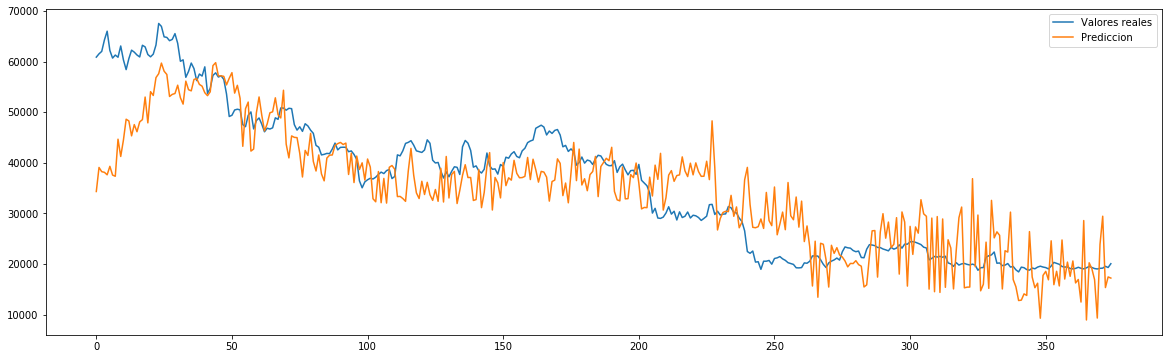

In [85]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [86]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 5730.311723645834
R-cuadrado: 0.7143245532934286
Tasa de acierto de subida: 0.5053475935828877


Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_93 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_94 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_95 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_96 (LSTM)              (None, 11, 8)             640       
                                                                 
 lstm_97 (LSTM)              (None, 11, 6)             360       
                                                                 
 lstm_98 (LSTM)              (None, 11, 5)             240       
                                                                 
 lstm_99 (LSTM)              (None, 11, 5)           

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX1)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

# CONJUNTO DE DATOS 2

In [ ]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(1))
    model.compile(optimizer=optimizer_fun, loss=loss_fun)
    return model

In [ ]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

In [ ]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','mae','adam')
modelLSTM100.summary()

In [ ]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','mae','adam')
modelLSTM64.summary()

In [ ]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','mae','adam')
modelLSTM32.summary()

In [ ]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','mae','adam')
modelLSTM100.summary()

In [ ]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','mae','adam')
modelLSTM64.summary()

In [ ]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','mae','adam')
modelLSTM32.summary()

In [ ]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','mae','adam')
modelLSTM100.summary()

modelLSTM100.fit(trainX2, trainy2, epochs=100)
 

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','mae','adam')
modelLSTM64.summary()

modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','mae','adam')
modelLSTM32.summary()

modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

In [ ]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

In [ ]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

In [ ]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

In [ ]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

In [ ]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

In [ ]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

modelLSTM100.fit(trainX2, trainy2, epochs=100)
 

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

In [ ]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

modelLSTM32.fit(trainX2, trainy2, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX2)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

# CONJUNTO DE DATOS 3

In [ ]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(1))
    model.compile(optimizer=optimizer_fun, loss=loss_fun)
    return model

In [ ]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

In [ ]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','mae','adam')
modelLSTM100.summary()

In [ ]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','mae','adam')
modelLSTM64.summary()

In [ ]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,y_predLSTM64))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','mae','adam')
modelLSTM32.summary()

In [ ]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','mae','adam')
modelLSTM100.summary()

In [ ]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','mae','adam')
modelLSTM64.summary()

In [ ]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','mae','adam')
modelLSTM32.summary()

In [ ]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','mae','adam')
modelLSTM100.summary()

modelLSTM100.fit(trainX3, trainy3, epochs=100)
 

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','mae','adam')
modelLSTM64.summary()

modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','mae','adam')
modelLSTM32.summary()

modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model1(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

In [ ]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model1(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

In [ ]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model1(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

In [ ]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [ ]:
modelLSTM100 = build_model2(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

In [ ]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 64 neuronas

In [ ]:
modelLSTM64 = build_model2(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

In [ ]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model2(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

In [ ]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [ ]:
modelLSTM100 = build_model3(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

modelLSTM100.fit(trainX3, trainy3, epochs=100)
 

In [ ]:
y_predLSTM100 = modelLSTM100.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 64 neuronas:

In [ ]:
modelLSTM64 = build_model3(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

modelLSTM64.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM64 = modelLSTM64.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Modelo 32 neuronas:

In [ ]:
modelLSTM32 = build_model3(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

modelLSTM32.fit(trainX3, trainy3, epochs=100)

In [ ]:
y_predLSTM32 = modelLSTM32.predict(testX3)

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [ ]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))